<span style="font-size:200%">노인여가지표 제작 과정<br></span> 
<span style="font-size:150%">Main.ipynb </span> 
- 여가시설
- 노인인구
- 노인소득
- 노인건강 
- 교통편의
- 여가 만족도

# 1. 필요 라이브러리 호출 <br><span style="font-size:50%"> Please modify the font name to fit your OS

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
# 시각화 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc  
rc('font', family='Malgun Gothic') 	
plt.rcParams['axes.unicode_minus'] = False  
# 스케일링
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
# PCA
from sklearn.decomposition import PCA

## 1.1.경로설정

In [2]:
Path = os.path.join('C:','Users','HyungHu','DataCampus','Project(2023.08)','Merged','Data_in_Code')
path_result = os.path.join('C:','Users','HyungHu','DataCampus','Project(2023.08)','Merged','PREPROCESS')

## 1.2.데이터 불러오기

In [3]:
#각 분야 공통 사용 변수 -> 여가 만족도
df_5 = pd.read_csv("Data_in_Code/자치구별 만족도.csv", encoding = 'utf8')
df_5.rename(columns={'자치구별':'자치구'},inplace=True)

In [4]:
#맥북은 인코딩 방식을 utf-8사용하기 때문에 윈도우 방식인 cp949로 인코딩을 해준다.
df_1 = pd.read_csv("Data_in_Code/자치구별 노인 건강(음주 여부 구분).csv", encoding = 'utf8')
df_2 = pd.read_csv("Data_in_Code/교통편의.csv", encoding = 'utf8')
df_3 = pd.read_csv("Data_in_Code/자치구노인인구수_독거포함_최종.csv", encoding = 'utf8')
df_4 = pd.read_csv("Data_in_Code/자치구별여가시설수_4차.csv", encoding = 'utf8')
df_6 = pd.read_csv("Data_in_Code/자치구별노인인구수비율.csv", encoding = 'utf8')
df_7 = pd.read_csv("Data_in_Code/2021년 노인 월평균 소득+공시지가.csv", encoding = 'cp949')

## 1.3.스케일링 변수 설정

In [5]:
Mscaler = MinMaxScaler()
Sscaler = StandardScaler()

# 2. 여가시설수

## 2.1.여가시설수 데이터 개요

In [6]:
facil_data = pd.read_csv('Data_in_Code/시설수데이터+만족도.csv')
facil_data.head()

,자치구,호텔수,노래방시설수,오락실시설수,무도회장시설수,썰매장시설수,빙상장 수,체육시설 수,편의시설수,공연시설수,...,도서관 수,목욕탕 수,영화관 수,유적지 수,축제 수,테마파크 수,노인복지관 시설수,경로당 시설수,노인교실 시설수,만족도(평균/5점만점)
0,강남구,63,221,1,0,0,3,54,11678,1374,...,15,404,10,6,80,0,3,167,20,3.4
1,강동구,4,228,12,1,0,0,2,5180,38,...,10,162,3,1,91,1,2,124,10,3.0
2,강북구,6,300,26,1,0,2,2,1715,20,...,7,125,3,4,97,1,1,100,17,3.0
3,강서구,20,303,18,0,1,1,4,5172,97,...,9,153,6,2,22,0,1,219,25,3.2
4,관악구,15,267,59,2,0,0,4,2336,44,...,5,160,2,1,84,0,1,113,17,3.1


In [7]:
facil_data.rename(columns={"만족도(평균/5점만점)":"만족도"},inplace=True)
facil_data

,자치구,호텔수,노래방시설수,오락실시설수,무도회장시설수,썰매장시설수,빙상장 수,체육시설 수,편의시설수,공연시설수,...,도서관 수,목욕탕 수,영화관 수,유적지 수,축제 수,테마파크 수,노인복지관 시설수,경로당 시설수,노인교실 시설수,만족도
0,강남구,63,221,1,0,0,3,54,11678,1374,...,15,404,10,6,80,0,3,167,20,3.4
1,강동구,4,228,12,1,0,0,2,5180,38,...,10,162,3,1,91,1,2,124,10,3.0
2,강북구,6,300,26,1,0,2,2,1715,20,...,7,125,3,4,97,1,1,100,17,3.0
3,강서구,20,303,18,0,1,1,4,5172,97,...,9,153,6,2,22,0,1,219,25,3.2
4,관악구,15,267,59,2,0,0,4,2336,44,...,5,160,2,1,84,0,1,113,17,3.1
5,광진구,12,306,5,0,1,1,3,3603,78,...,7,155,6,2,113,4,1,95,8,3.3
6,구로구,14,293,44,0,0,2,2,3094,52,...,13,129,3,2,150,0,1,201,20,2.6
7,금천구,10,191,14,0,0,0,1,3203,41,...,4,89,2,0,47,0,2,73,9,3.1
8,노원구,1,257,4,0,1,2,4,1526,24,...,9,113,5,8,128,1,1,246,14,3.3
9,도봉구,3,213,13,2,0,0,1,2477,16,...,9,90,2,1,136,0,1,136,8,2.7


In [8]:
## 이후, 여가시설수가 너무 많다 판단하여, 상관관계가 높은 비슷한 여가시설끼리 묶어서 변수 감소를 진행
## (df_facil -> df_4)`

In [9]:
df_4

,자치구,문화예술시설,스포츠시설 수,관광 시설,취미오락 시설,휴식 시설,소비 시설,노인시설 수
0,종로구,505,250,1155,114,286,11065,75
1,중구,230,426,429,86,386,14225,55
2,용산구,253,217,63,81,286,10126,112
3,성동구,260,266,110,177,255,8844,180
4,광진구,193,407,128,324,247,12072,104
5,동대문구,161,301,90,200,220,10694,148
6,중랑구,137,316,49,341,251,11092,144
7,성북구,246,446,50,165,267,10665,189
8,강북구,126,282,114,336,240,7980,118
9,도봉구,134,367,141,237,190,7729,149


In [10]:
df_4 = df_4.sort_values(by='자치구' ,ascending=True)
merged_df_4 = df_4.merge(df_5)
merged_df_4

,자치구,문화예술시설,스포츠시설 수,관광 시설,취미오락 시설,휴식 시설,소비 시설,노인시설 수,만족도(평균/5점만점)
0,강남구,1641,1335,94,247,665,32896,193,3.4
1,강동구,207,445,98,253,332,14426,137,3.0
2,강북구,126,282,114,336,240,7980,118,3.0
3,강서구,307,766,27,336,430,16152,249,3.2
4,관악구,240,354,90,333,326,11788,131,3.1
5,광진구,193,407,128,324,247,12072,104,3.3
6,구로구,219,486,156,353,243,11187,223,2.6
7,금천구,121,315,48,211,190,9603,85,3.1
8,노원구,229,477,147,275,342,9268,263,3.3
9,도봉구,134,367,141,237,190,7729,149,2.7


## 2.2.스케일링 후 여가만족도와 여가시설의 상관관계 분석 및 히트맵

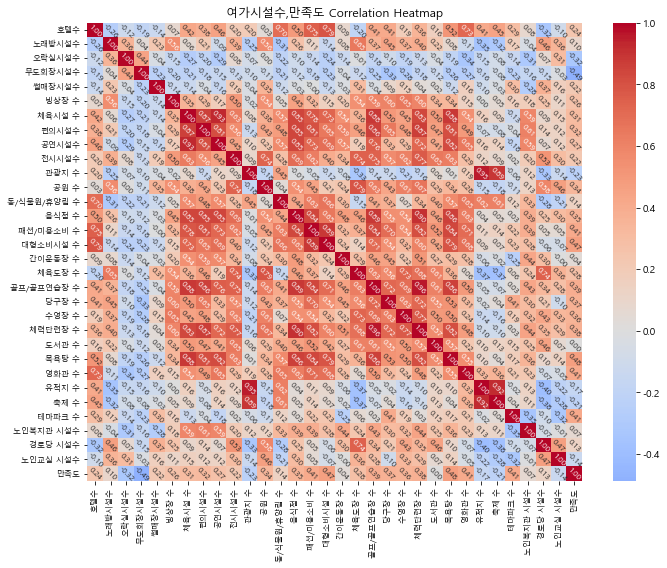

In [11]:
correlation_matrix = facil_data.corr()
plt.figure(figsize=(10, 8))
# 히트맵 제작
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')

# Adjust font size for the property labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)

# Adjust font size and rotation for the annotation values
for text in heatmap.texts:
    text.set_fontsize(8)
    text.set_rotation(-45)  # You can adjust the rotation angle

plt.title('여가시설수,만족도 Correlation Heatmap')
plt.tight_layout()
plt.show()

In [12]:
merged_df_4=merged_df_4.drop('자치구', axis=1)
column_names = merged_df_4.columns


df_4_CORR=np.array(merged_df_4)
scaled_df_2 = pd.DataFrame(Mscaler.fit_transform(merged_df_4),columns=column_names)

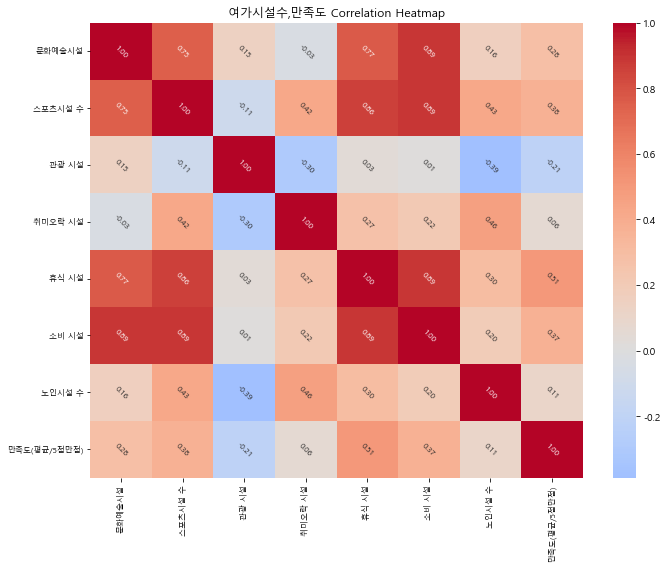

In [13]:
correlation_matrix = scaled_df_2.corr()
plt.figure(figsize=(10, 8))
# 히트맵 제작
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')

# Adjust font size for the property labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)

# Adjust font size and rotation for the annotation values
for text in heatmap.texts:
    text.set_fontsize(8)
    text.set_rotation(-45)  # You can adjust the rotation angle

plt.title('여가시설수,만족도 Correlation Heatmap')
plt.tight_layout()
plt.show()

## 2.3.여가시설 PCA 및 가중치 부여 과정

In [14]:
df_4.sort_values(by='자치구', inplace=True)

In [15]:
df_4_PCA=df_4.drop('자치구', axis=1)
df_4_PCA

,문화예술시설,스포츠시설 수,관광 시설,취미오락 시설,휴식 시설,소비 시설,노인시설 수
22,1641,1335,94,247,665,32896,193
24,207,445,98,253,332,14426,137
8,126,282,114,336,240,7980,118
15,307,766,27,336,430,16152,249
20,240,354,90,333,326,11788,131
4,193,407,128,324,247,12072,104
16,219,486,156,353,243,11187,223
17,121,315,48,211,190,9603,85
10,229,477,147,275,342,9268,263
9,134,367,141,237,190,7729,149


In [16]:
df_4_PCA=np.array(df_4_PCA)
df_scaled_2 = pd.DataFrame(Mscaler.fit_transform(df_4_PCA))
df_scaled_2

,0,1,2,3,4,5,6
0,1.000000,1.000000,0.059397,0.4150,1.000000,1.000000,0.663462
1,0.056579,0.203936,0.062943,0.4300,0.298947,0.273207,0.394231
2,0.003289,0.058140,0.077128,0.6375,0.105263,0.019557,0.302885
3,0.122368,0.491055,0.000000,0.6375,0.505263,0.341125,0.932692
4,0.078289,0.122540,0.055851,0.6300,0.286316,0.169401,0.365385
5,0.047368,0.169946,0.089539,0.6075,0.120000,0.180577,0.235577
6,0.064474,0.240608,0.114362,0.6800,0.111579,0.145752,0.807692
7,0.000000,0.087657,0.018617,0.3250,0.000000,0.083422,0.144231
8,0.071053,0.232558,0.106383,0.4850,0.320000,0.070240,1.000000
9,0.008553,0.134168,0.101064,0.3900,0.000000,0.009680,0.451923


In [17]:
pca = PCA()  # 주성분 개수 설정

# PCA 적용
transformed_data = pca.fit_transform(df_scaled_2)

In [18]:
explained_var_ratio = pca.explained_variance_ratio_

# explain_ratio를 가중치로 주어 주성분의 중요도를 표현
weighted_var_ratio = explained_var_ratio / np.sum(explained_var_ratio)

In [19]:
print("PCA-based Weights:")
for i, weight in enumerate(weighted_var_ratio):
    print(f"Variable {i + 1}: {weight:.3f}")

PCA-based Weights:
Variable 1: 0.533
Variable 2: 0.248
Variable 3: 0.099
Variable 4: 0.077
Variable 5: 0.023
Variable 6: 0.016
Variable 7: 0.005


In [20]:
indicator_scores = []
for i in range(len(df_scaled_2)):
    score = np.dot(df_scaled_2.iloc[i], weighted_var_ratio)    
    indicator_scores.append(score)

# 결과를 데이터프레임으로 변환
indicator_scores_df = pd.DataFrame({'Indicator_Score': indicator_scores})

# 결과 출력
indicator_scores_df

,Indicator_Score
0,0.860505
1,0.133190
2,0.077255
3,0.257555
4,0.137351
5,0.129865
6,0.166426
7,0.050652
8,0.156650
9,0.080147


In [21]:
## 점수표 '자치구별'정렬
df_4.sort_values(by='자치구', inplace=True)
indicator_scores_df = pd.DataFrame({'자치구': df_4['자치구'], '여가시설점수': indicator_scores})
indicator_scores_df

indicator_scores_df.set_index(keys='자치구',inplace=True)
indicator_scores_df

,여가시설점수
자치구,
강남구,0.860505
강동구,0.133190
강북구,0.077255
강서구,0.257555
관악구,0.137351
광진구,0.129865
구로구,0.166426
금천구,0.050652
노원구,0.156650


In [22]:
# 건강 점수에 5를 곱한 새로운 열 추가
indicator_scores = indicator_scores_df['여가시설점수'] * 5
indicator_scores_df['여가시설점수pca'] = indicator_scores
indicator_scores_df.drop('여가시설점수', axis=1,inplace = True)
indicator_scores_df

,여가시설점수pca
자치구,
강남구,4.302524
강동구,0.665949
강북구,0.386273
강서구,1.287775
관악구,0.686754
광진구,0.649323
구로구,0.832129
금천구,0.253262
노원구,0.783249


## 2.4.여가시설 OLS 및 가중치 부여 과정

In [23]:
df_4.columns

Index(['자치구', '문화예술시설', '스포츠시설 수', '관광 시설', '취미오락 시설', '휴식 시설', '소비 시설',
       '노인시설 수'],
      dtype='object')

In [24]:
y = scaled_df_2["만족도(평균/5점만점)"]
X = scaled_df_2[df_4.drop('자치구', axis=1).columns]

# Add a constant term to the X matrix for the intercept
X = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X).fit()

# Get regression coefficients
coefficients = model.params[1:]  # Exclude the intercept

# Normalize coefficients to get weights
weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Print the weights
print("Regression Coefficient-based Weights:")
print(weights)

Regression Coefficient-based Weights:
문화예술시설     0.011644
스포츠시설 수    0.033186
관광 시설      0.153188
취미오락 시설    0.049952
휴식 시설      0.420927
소비 시설      0.257333
노인시설 수     0.073769
dtype: float64


In [25]:
ols_weight= [0.011644,0.033186,0.153188,0.049952,0.420927,0.257333,0.073769]

In [26]:
weighted_df = scaled_df_2[df_4.drop('자치구', axis=1).columns].copy()  # Create a copy of the original DataFrame
for i, col in enumerate(df_4.drop('자치구', axis=1).columns):
    weighted_df[col] = scaled_df_2[col] * ols_weight[i]

In [27]:
row_sums = weighted_df.sum(axis=1)

# Add the row sums as a new attribute in a new column
weighted_df['자치구별여가시설점수'] = row_sums
result = weighted_df["자치구별여가시설점수"]*5

In [28]:
df_5['자치구']
Gu = df_5["자치구"].tolist()

result.tolist()

[4.009309534274413,
 1.3188511696540426,
 0.5865569721017303,
 2.0941536526722473,
 1.1803419656060308,
 0.8230572003239912,
 1.0213892316505648,
 0.27051116855547175,
 1.3780447228796278,
 0.37672028022802106,
 0.5914954091995083,
 0.4424610182564351,
 1.3358074061906993,
 0.5242808970728707,
 1.7886194457657578,
 0.707469980509746,
 0.8467414215449456,
 2.6717169172899173,
 0.8025461119478006,
 1.5762627905400084,
 0.6897519581069971,
 1.1096542490500882,
 1.4483321793333719,
 1.5210716792935244,
 0.8034155491168555]

In [29]:
result_df_ols = pd.DataFrame({'자치구': Gu, '자치구별노인소득점수': result})
result_df_ols

,자치구,자치구별노인소득점수
0,강남구,4.009310
1,강동구,1.318851
2,강북구,0.586557
3,강서구,2.094154
4,관악구,1.180342
5,광진구,0.823057
6,구로구,1.021389
7,금천구,0.270511
8,노원구,1.378045
9,도봉구,0.376720


# 3.노인인구수 데이터

## 3.1.노인인구수 데이터 개요

In [30]:
data1 = pd.read_csv('Data_in_Code/자치구노인인구수_독거포함_최종.csv', encoding='utf8')
data1_1 = data1.set_index('자치구')
data1_1

,일반노인수,독거노인수
자치구,,
강남구,67665,15432
강동구,63647,16059
강북구,41861,25195
강서구,75796,22863
관악구,63112,20308
광진구,42695,12159
구로구,61276,15983
금천구,33041,10731
노원구,69509,23770


## 3.2.스케일링 후 여가만족도와 노인인구의 상관관계 분석 및 히트맵

In [31]:
# 노인인구수
df_3.sort_values('자치구',inplace=True)

In [32]:
merged_df_3 = df_3.merge(df_5)
merged_df_3.drop('자치구',axis=1,inplace=True)
merged_df_3

,일반노인수,독거노인수,만족도(평균/5점만점)
0,67665,15432,3.4
1,63647,16059,3.0
2,41861,25195,3.0
3,75796,22863,3.2
4,63112,20308,3.1
5,42695,12159,3.3
6,61276,15983,2.6
7,33041,10731,3.1
8,69509,23770,3.3
9,53153,14961,2.7


In [33]:
column_names = merged_df_3.columns

scaled_df_3 = pd.DataFrame(Mscaler.fit_transform(merged_df_3), columns=column_names)

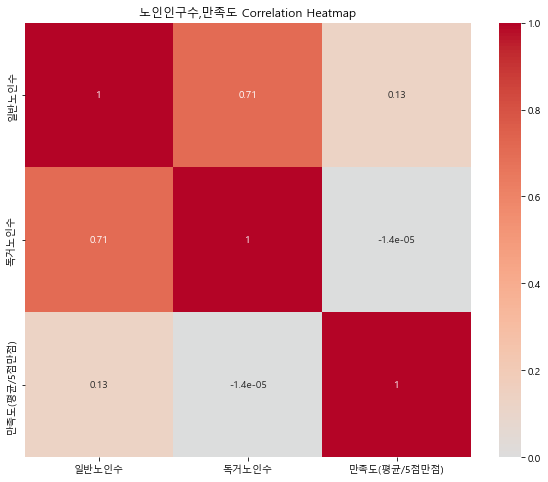

In [34]:
# 상관도 매트릭스 
correlation_matrix = scaled_df_3.corr()
plt.figure(figsize=(10, 8))
# 히트맵 제작
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('노인인구수,만족도 Correlation Heatmap')
plt.show()

In [35]:
# 노인인구비율
df_6.sort_values('자치구',inplace=True)
merged_df_3 = df_6.merge(df_5)
merged_df_3.drop(['자치구','Unnamed: 0'],axis=1,inplace=True)
column_names = merged_df_3.columns

scaled_df_3 = pd.DataFrame(Mscaler.fit_transform(merged_df_3), columns=column_names)

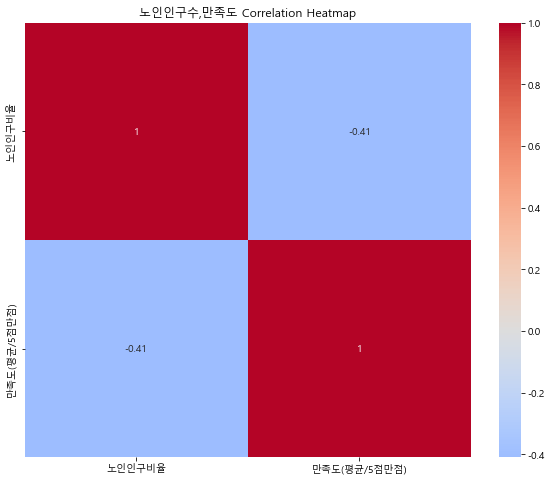

In [36]:
# 상관도 매트릭스 
correlation_matrix = scaled_df_3.corr()
plt.figure(figsize=(10, 8))
# 히트맵 제작
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('노인인구수,만족도 Correlation Heatmap')
plt.show()

## 3.3.노인인구수 PCA 가중치부여

In [37]:
#data1 스케일링
# List of column names for which to calculate correlations
column_names = data1_1.columns

# Scale the data using MinMaxScaler
scaled_df_3 = pd.DataFrame(Mscaler.fit_transform(data1_1), columns=column_names)

In [38]:
#data1 노인인구수 PCA분석 (PCA할때는 독립변수만 들어감!! 종속X)
pca = PCA()
principal_components = pca.fit_transform(scaled_df_3[data1_1.columns])

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate weights based on explained variance ratio
weights = explained_variance_ratio / np.sum(explained_variance_ratio)
print("PCA-based Weights: ")
for i, weight in enumerate(weights):
    print(f"Variable {i + 1}: {weight:.3f}")

PCA-based Weights: 
Variable 1: 0.855
Variable 2: 0.145


In [39]:
pca_weight = [0.855, 0.145]
scaled_df_3["일반노인수"].tolist()
weighted_df = scaled_df_3[data1_1.columns].copy()  # Create a copy of the original DataFrame
for i, col in enumerate(data1_1.columns):
    weighted_df[col] = scaled_df_3[col] * pca_weight[i]

row_sums = weighted_df.sum(axis=1)

# Add the row sums as a new attribute in a new column
weighted_df['자치구별노인인구수점수'] = row_sums
result = weighted_df["자치구별노인인구수점수"]*5

result.tolist()

[3.430359008912682,
 3.205805767761751,
 2.2239911833284753,
 4.2422950197243665,
 3.3470886095722063,
 1.7402331621011449,
 3.0549701374706912,
 1.0801087972893042,
 3.8878905701947772,
 2.506911108822244,
 2.2784200599566806,
 2.553255678716211,
 1.8230776339771173,
 1.8295539454745702,
 2.3071976490153543,
 1.3477366515450546,
 3.08019558984447,
 4.734772134678607,
 2.8402226935216035,
 2.370844391237875,
 0.8032854456313033,
 3.7812260882269007,
 0.1597878993357673,
 0.0,
 2.9142745005584203]

In [40]:
Gu = [
    "강남구", "강동구", "강북구", "강서구", "관악구", "광진구", "구로구", "금천구", "노원구", "도봉구",
    "동대문구", "동작구", "마포구", "서대문구", "서초구", "성동구", "성북구", "송파구", "양천구", "영등포구",
    "용산구", "은평구", "종로구", "중구", "중랑구"
]
print(Gu)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [41]:
result_df_pca = pd.DataFrame({'자치구': Gu, '자치구별노인인구수점수': result})
result_df_pca

,자치구,자치구별노인인구수점수
0,강남구,3.430359
1,강동구,3.205806
2,강북구,2.223991
3,강서구,4.242295
4,관악구,3.347089
5,광진구,1.740233
6,구로구,3.054970
7,금천구,1.080109
8,노원구,3.887891
9,도봉구,2.506911


## 3.4.노인인구수 OLS 및 가중치 부여

In [42]:
df_5

,자치구,만족도(평균/5점만점)
0,강남구,3.4
1,강동구,3.0
2,강북구,3.0
3,강서구,3.2
4,관악구,3.1
5,광진구,3.3
6,구로구,2.6
7,금천구,3.1
8,노원구,3.3
9,도봉구,2.7


In [43]:
data2 = df_5.set_index('자치구')
concatenated_df = pd.concat([data1_1, data2], axis=1)
concatenated_df

,일반노인수,독거노인수,만족도(평균/5점만점)
자치구,,,
강남구,67665,15432,3.4
강동구,63647,16059,3.0
강북구,41861,25195,3.0
강서구,75796,22863,3.2
관악구,63112,20308,3.1
광진구,42695,12159,3.3
구로구,61276,15983,2.6
금천구,33041,10731,3.1
노원구,69509,23770,3.3


In [44]:
#concatenated_df 스케일링
# List of column names for which to calculate correlations
column_names = concatenated_df.columns

# Scale the data using MinMaxScaler
scaled_df_3 = pd.DataFrame(Mscaler.fit_transform(concatenated_df), columns=column_names)

In [45]:
correlation_matrix = scaled_df_3.corr()

In [46]:
# Set up the dependent variable (target) and explanatory variables
y = scaled_df_3["만족도(평균/5점만점)"]
X = scaled_df_3[data1_1.columns]

# Add a constant term to the X matrix for the intercept
X = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X).fit()

# Get regression coefficients
coefficients = model.params[1:]  # Exclude the intercept

# Normalize coefficients to get weights
weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Print the weights
print("Regression Coefficient-based Weights:")
print(weights)

Regression Coefficient-based Weights:
일반노인수    0.602374
독거노인수    0.397626
dtype: float64


In [47]:
ols_weight = [0.602374, 0.397626]
weighted_df = scaled_df_3[data1_1.columns].copy()  # Create a copy of the original DataFrame
for i, col in enumerate(data1_1.columns):
    weighted_df[col] = scaled_df_3[col] * ols_weight[i]

In [48]:
row_sums = weighted_df.sum(axis=1)

# Add the row sums as a new attribute in a new column
weighted_df['자치구별노인인구점수'] = row_sums

In [49]:
result = weighted_df["자치구별노인인구점수"]*5
result.tolist()

[3.0765834665966962,
 2.9708838687252914,
 3.0442157486155637,
 4.270891154943932,
 3.426234220880089,
 1.6117556708249612,
 2.8582512351498446,
 1.0270965561559677,
 4.097154618820905,
 2.386544154062926,
 2.3996610536441763,
 2.3965854795231767,
 1.7680982308654185,
 1.7970293981847951,
 1.857033972323538,
 1.2575187863047632,
 3.063768930070298,
 4.272679343611835,
 2.635608334248812,
 2.311364769544248,
 0.8688278832799473,
 3.7732977204517217,
 0.19799055590400882,
 0.0,
 3.0335435117741367]

In [50]:
# Create a DataFrame
result_df_ols = pd.DataFrame({'자치구': Gu, '자치구별노인인구점수': result})
result_df_ols

,자치구,자치구별노인인구점수
0,강남구,3.076583
1,강동구,2.970884
2,강북구,3.044216
3,강서구,4.270891
4,관악구,3.426234
5,광진구,1.611756
6,구로구,2.858251
7,금천구,1.027097
8,노원구,4.097155
9,도봉구,2.386544


# 4. 노인건강 데이터

## 4.1.노인건강 데이터 개요

In [51]:
health = pd.read_csv("Data_in_Code/자치구별 노인 건강(음주 여부 구분).csv")

health.drop(['Unnamed: 19',	'Unnamed: 20'], axis=1, inplace=True)
health.rename(columns={'지역':'자치구'},inplace=True)
health

,자치구,질병없음,질병있음,운동X,운동 평균 횟수,건강(나쁨),건강(보통),건강(좋음),흡연,비흡연,장애등록O,장애등록X,우울증상없음,우울증상있음,음주 X,음주 O,일상생활 완전 자립,일상생활 도움 필요,사회/여가/문화 만족도(평균)
0,강남구,0.143,0.857,0.119,2.7,0.078,0.295,0.627,0.021,0.979,0.000,1.000,0.893,0.107,0.717,0.283,0.877,0.124,0.034
1,강동구,0.242,0.758,0.609,1.2,0.189,0.347,0.464,0.193,0.807,0.038,0.962,0.928,0.072,0.638,0.362,0.858,0.136,0.030
2,강북구,0.145,0.855,0.173,2.2,0.138,0.498,0.364,0.155,0.845,0.071,0.929,0.901,0.099,0.422,0.578,0.959,0.041,0.030
3,강서구,0.192,0.808,0.043,3.7,0.159,0.312,0.529,0.107,0.893,0.090,0.910,0.925,0.075,0.690,0.310,0.858,0.139,0.032
4,관악구,0.176,0.824,0.169,3.5,0.190,0.240,0.570,0.138,0.862,0.064,0.936,0.816,0.184,0.726,0.274,0.846,0.126,0.031
5,광진구,0.201,0.799,0.084,2.6,0.025,0.384,0.591,0.172,0.828,0.015,0.985,0.975,0.025,0.142,0.858,0.943,0.057,0.033
6,구로구,0.114,0.886,0.181,3.4,0.275,0.303,0.422,0.125,0.875,0.081,0.919,0.807,0.193,0.635,0.365,0.906,0.088,0.026
7,금천구,0.181,0.819,0.152,3.3,0.213,0.368,0.419,0.073,0.927,0.069,0.931,0.880,0.120,0.704,0.296,0.852,0.148,0.031
8,노원구,0.185,0.815,0.230,2.7,0.199,0.414,0.386,0.174,0.826,0.082,0.918,0.912,0.088,0.467,0.533,0.815,0.162,0.033
9,도봉구,0.211,0.789,0.379,1.9,0.235,0.400,0.365,0.057,0.943,0.017,0.983,0.870,0.130,0.735,0.265,0.917,0.084,0.027


In [52]:
#노인건강 중 선택지표는 부정선택 지표 모아,확인해봄.
health_1=health[['자치구','질병있음', '운동X', '운동 평균 횟수','흡연','음주 O','우울증상있음','장애등록O','일상생활 도움 필요','건강(나쁨)','사회/여가/문화 만족도(평균)']]
health_1

,자치구,질병있음,운동X,운동 평균 횟수,흡연,음주 O,우울증상있음,장애등록O,일상생활 도움 필요,건강(나쁨),사회/여가/문화 만족도(평균)
0,강남구,0.857,0.119,2.7,0.021,0.283,0.107,0.000,0.124,0.078,0.034
1,강동구,0.758,0.609,1.2,0.193,0.362,0.072,0.038,0.136,0.189,0.030
2,강북구,0.855,0.173,2.2,0.155,0.578,0.099,0.071,0.041,0.138,0.030
3,강서구,0.808,0.043,3.7,0.107,0.310,0.075,0.090,0.139,0.159,0.032
4,관악구,0.824,0.169,3.5,0.138,0.274,0.184,0.064,0.126,0.190,0.031
5,광진구,0.799,0.084,2.6,0.172,0.858,0.025,0.015,0.057,0.025,0.033
6,구로구,0.886,0.181,3.4,0.125,0.365,0.193,0.081,0.088,0.275,0.026
7,금천구,0.819,0.152,3.3,0.073,0.296,0.120,0.069,0.148,0.213,0.031
8,노원구,0.815,0.230,2.7,0.174,0.533,0.088,0.082,0.162,0.199,0.033
9,도봉구,0.789,0.379,1.9,0.057,0.265,0.130,0.017,0.084,0.235,0.027


## 4.2.스케일링 후 여가만족도와 노인건강의 상관관계 분석 및 히트맵

In [53]:
health_1=health_1.drop(['자치구'],axis=1)
column_names=health_1.columns
scaled_df_4 = pd.DataFrame(Mscaler.fit_transform(health_1), columns=column_names)
scaled_df_4

,질병있음,운동X,운동 평균 횟수,흡연,음주 O,우울증상있음,장애등록O,일상생활 도움 필요,건강(나쁨),사회/여가/문화 만족도(평균)
0,0.757085,0.134276,0.60,0.000000,0.051136,0.311189,0.000000,0.312865,0.222222,1.000
1,0.356275,1.000000,0.00,0.988506,0.163352,0.188811,0.348624,0.347953,0.538462,0.500
2,0.748988,0.229682,0.40,0.770115,0.470170,0.283217,0.651376,0.070175,0.393162,0.500
3,0.558704,0.000000,1.00,0.494253,0.089489,0.199301,0.825688,0.356725,0.452991,0.750
4,0.623482,0.222615,0.92,0.672414,0.038352,0.580420,0.587156,0.318713,0.541311,0.625
5,0.522267,0.072438,0.56,0.867816,0.867898,0.024476,0.137615,0.116959,0.071225,0.875
6,0.874494,0.243816,0.88,0.597701,0.167614,0.611888,0.743119,0.207602,0.783476,0.000
7,0.603239,0.192580,0.84,0.298851,0.069602,0.356643,0.633028,0.383041,0.606838,0.625
8,0.587045,0.330389,0.60,0.879310,0.406250,0.244755,0.752294,0.423977,0.566952,0.875
9,0.481781,0.593640,0.28,0.206897,0.025568,0.391608,0.155963,0.195906,0.669516,0.125


<AxesSubplot:title={'center':'건강 상관 히트맵'}>

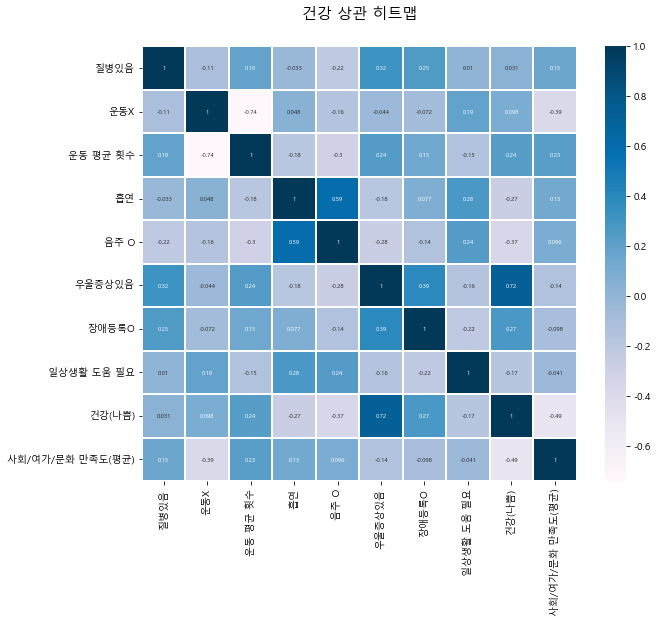

In [54]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("건강 상관 히트맵", y = 1.05, size = 15)
sns.heatmap(scaled_df_4.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" :6})

In [55]:
health_1.columns

Index(['질병있음', '운동X', '운동 평균 횟수', '흡연', '음주 O', '우울증상있음', '장애등록O',
       '일상생활 도움 필요', '건강(나쁨)', '사회/여가/문화 만족도(평균)'],
      dtype='object')

## 4.3.노인건강 PCA 가중치부여

In [56]:
x = health[['일상생활 완전 자립', '일상생활 도움 필요']]

In [57]:
pca = PCA(n_components=1)
pca.fit(x)

PCA(n_components=1)

In [58]:
pca.components_

array([[-0.71756786,  0.69648859]])

In [59]:
pca.explained_variance_ratio_

array([0.99716395])

In [60]:
health_1['일상생활 자립 여부'] = pca.transform(x)
health_1

,질병있음,운동X,운동 평균 횟수,흡연,음주 O,우울증상있음,장애등록O,일상생활 도움 필요,건강(나쁨),사회/여가/문화 만족도(평균),일상생활 자립 여부
0,0.857,0.119,2.7,0.021,0.283,0.107,0.000,0.124,0.078,0.034,-0.012684
1,0.758,0.609,1.2,0.193,0.362,0.072,0.038,0.136,0.189,0.030,0.009307
2,0.855,0.173,2.2,0.155,0.578,0.099,0.071,0.041,0.138,0.030,-0.129333
3,0.808,0.043,3.7,0.107,0.310,0.075,0.090,0.139,0.159,0.032,0.011397
4,0.824,0.169,3.5,0.138,0.274,0.184,0.064,0.126,0.190,0.031,0.010953
5,0.799,0.084,2.6,0.172,0.858,0.025,0.015,0.057,0.025,0.033,-0.106708
6,0.886,0.181,3.4,0.125,0.365,0.193,0.081,0.088,0.275,0.026,-0.058567
7,0.819,0.152,3.3,0.073,0.296,0.120,0.069,0.148,0.213,0.031,0.021971
8,0.815,0.230,2.7,0.174,0.533,0.088,0.082,0.162,0.199,0.033,0.058272
9,0.789,0.379,1.9,0.057,0.265,0.130,0.017,0.084,0.235,0.027,-0.069246


In [61]:
column_names = scaled_df_4.columns

# Scale the data using MinMaxScaler
scaled_df_4 = pd.DataFrame(Mscaler.fit_transform(scaled_df_4), columns=column_names)

# 독립 변수와 종속 변수를 분리합니다
X = scaled_df_4.drop(['사회/여가/문화 만족도(평균)'], axis=1)  # 종속 변수를 제외한 나머지 변수를 독립 변수로 설정
y = scaled_df_4['사회/여가/문화 만족도(평균)']  # 종속 변수 설정

scaled_df_4

,질병있음,운동X,운동 평균 횟수,흡연,음주 O,우울증상있음,장애등록O,일상생활 도움 필요,건강(나쁨),사회/여가/문화 만족도(평균)
0,0.757085,0.134276,0.60,0.000000,0.051136,0.311189,0.000000,0.312865,0.222222,1.000
1,0.356275,1.000000,0.00,0.988506,0.163352,0.188811,0.348624,0.347953,0.538462,0.500
2,0.748988,0.229682,0.40,0.770115,0.470170,0.283217,0.651376,0.070175,0.393162,0.500
3,0.558704,0.000000,1.00,0.494253,0.089489,0.199301,0.825688,0.356725,0.452991,0.750
4,0.623482,0.222615,0.92,0.672414,0.038352,0.580420,0.587156,0.318713,0.541311,0.625
5,0.522267,0.072438,0.56,0.867816,0.867898,0.024476,0.137615,0.116959,0.071225,0.875
6,0.874494,0.243816,0.88,0.597701,0.167614,0.611888,0.743119,0.207602,0.783476,0.000
7,0.603239,0.192580,0.84,0.298851,0.069602,0.356643,0.633028,0.383041,0.606838,0.625
8,0.587045,0.330389,0.60,0.879310,0.406250,0.244755,0.752294,0.423977,0.566952,0.875
9,0.481781,0.593640,0.28,0.206897,0.025568,0.391608,0.155963,0.195906,0.669516,0.125


In [62]:
principal_components = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
PCA_weights = explained_variance_ratio / np.sum(explained_variance_ratio)
explained_variance_ratio

# 점수 계산
pca = PCA()
principal_components = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
PCA_weights = explained_variance_ratio / np.sum(explained_variance_ratio)

# Print the weights
print("PCA-based Weights:")
for i, PCA_weights in enumerate(PCA_weights):
    print(f"Variable {i + 1}: {PCA_weights:.3f}")

    
explained_variance_ratio

PCA-based Weights:
Variable 1: 0.308
Variable 2: 0.182
Variable 3: 0.163
Variable 4: 0.109
Variable 5: 0.095
Variable 6: 0.063
Variable 7: 0.051
Variable 8: 0.021
Variable 9: 0.009


array([0.30799047, 0.18208875, 0.16322749, 0.10879978, 0.09486223,
       0.06256219, 0.05072532, 0.02057879, 0.00916499])

In [63]:
PCA_weights

0.009164993143974324

In [64]:

# PCA 및 가중치 계산
pca = PCA()
principal_components = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
PCA_weights = explained_variance_ratio / np.sum(explained_variance_ratio)

# 점수 계산
indicator_scores = []
for i in range(len(X)):
    score = np.dot(X.iloc[i], PCA_weights)    
    indicator_scores.append(score)

# 결과를 데이터프레임으로 변환
indicator_scores_df = pd.DataFrame({'Indicator_Score': indicator_scores})

# 결과 출력
indicator_scores_df
# '자치구' 열 추가
indicator_scores_df = pd.DataFrame({'자치구': health['자치구'], '건강 점수': indicator_scores})
indicator_scores_df

indicator_scores_df.set_index(keys='자치구')


,건강 점수
자치구,
강남구,0.388356
강동구,0.456455
강북구,0.521992
강서구,0.463411
관악구,0.537144
광진구,0.453771
구로구,0.625731
금천구,0.464954
노원구,0.540501


In [65]:
# 건강 점수에 5를 곱한 새로운 열 추가
indicator_scores = indicator_scores_df['건강 점수'] * 5
indicator_scores_df['건강 점수(곱셈)'] = indicator_scores

indicator_scores_df

,자치구,건강 점수,건강 점수(곱셈)
0,강남구,0.388356,1.941781
1,강동구,0.456455,2.282276
2,강북구,0.521992,2.609959
3,강서구,0.463411,2.317057
4,관악구,0.537144,2.685719
5,광진구,0.453771,2.268856
6,구로구,0.625731,3.128655
7,금천구,0.464954,2.324770
8,노원구,0.540501,2.702505
9,도봉구,0.369697,1.848487


## 4.4.노인건강 OLS 및 가중치 부여

In [66]:
# Add a constant term to the X matrix for the intercept
X_1 = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X_1).fit()

# Get regression coefficients
coefficients = model.params[1:]  # Exclude the intercept

# Normalize coefficients to get weights
weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Print the weights
print("Regression Coefficient-based Weights:")
print(weights)

Regression Coefficient-based Weights:
질병있음          0.000771
운동X           0.093643
운동 평균 횟수      0.075835
흡연            0.061864
음주 O          0.066369
우울증상있음        0.220212
장애등록O         0.056737
일상생활 도움 필요    0.044238
건강(나쁨)        0.380329
dtype: float64


In [67]:
OLS_scores = []
for i in range(len(X_1)):
    score = np.dot(X.iloc[i], weights)    
    OLS_scores.append(score)

# 결과를 데이터프레임으로 변환
OLS_df = pd.DataFrame({'건강 점수(OLS)': OLS_scores})

# 결과 출력
OLS_df

,건강 점수(OLS)
0,0.228939
1,0.447457
2,0.383228
3,0.391584
4,0.516344
5,0.206403
6,0.622412
7,0.467505
8,0.489218
9,0.450081


In [68]:
# 건강 점수에 5를 곱한 새로운 열 추가
OLS_scores_df = OLS_df['건강 점수(OLS)'] * 5
OLS_df['건강 점수(곱셈)'] = OLS_scores_df

OLS_df

,건강 점수(OLS),건강 점수(곱셈)
0,0.228939,1.144694
1,0.447457,2.237284
2,0.383228,1.916140
3,0.391584,1.957922
4,0.516344,2.581720
5,0.206403,1.032014
6,0.622412,3.112062
7,0.467505,2.337524
8,0.489218,2.446091
9,0.450081,2.250406


# 5.노인소득 데이터

## 5.1.노인소득 데이터 개요

In [69]:
df_7

,지역,사례수(명),70만원(100만원 이하),150(100~199만원),250(200~299만원),350(300~399만원),450(400만원 이상),계,평균,기초연금수급률,사회/여가/문화 만족도(평균),공시지가
0,강남구,148,0.0,14.2,24.1,16.4,45.3,100.0,342.80,26.2,68,1.000000
1,강동구,140,20.2,17.2,22.8,18.8,21.0,100.0,257.24,51.9,60,0.208165
2,강북구,120,17.5,27.1,25.0,24.6,5.8,100.0,227.60,74.4,60,0.023375
3,강서구,174,16.7,22.8,21.4,18.2,20.9,100.0,257.14,63.0,64,0.051244
4,관악구,149,12.1,19.5,15.8,25.4,27.3,100.1,288.97,60.6,62,0.189163
5,광진구,97,1.9,33.7,31.5,16.7,16.1,99.9,261.53,51.8,66,0.252500
6,구로구,135,22.6,25.7,15.3,13.8,22.7,100.1,243.07,61.8,52,0.059265
7,금천구,76,22.6,17.2,23.1,26.2,10.8,99.9,239.67,66.6,62,0.074620
8,노원구,166,20.1,34.9,15.0,7.1,22.9,100.0,231.82,66.1,66,0.009979
9,도봉구,121,12.2,28.4,27.7,16.7,15.1,100.1,246.79,67.4,54,0.000000


In [70]:
df_7.drop("사례수(명)", axis=1, inplace=True)
df_7.drop("계", axis=1, inplace=True)
df_7.drop("사회/여가/문화 만족도(평균)", axis=1, inplace=True)
df_7.rename(columns={'지역':'자치구'},inplace=True)
df_7 = df_7.set_index('자치구')
df_5 = df_5.set_index('자치구')
merged_df = df_7.merge(df_5, left_index=True, right_index=True)

merged_df

,70만원(100만원 이하),150(100~199만원),250(200~299만원),350(300~399만원),450(400만원 이상),평균,기초연금수급률,공시지가,만족도(평균/5점만점)
자치구,,,,,,,,,
강남구,0.0,14.2,24.1,16.4,45.3,342.80,26.2,1.000000,3.4
강동구,20.2,17.2,22.8,18.8,21.0,257.24,51.9,0.208165,3.0
강북구,17.5,27.1,25.0,24.6,5.8,227.60,74.4,0.023375,3.0
강서구,16.7,22.8,21.4,18.2,20.9,257.14,63.0,0.051244,3.2
관악구,12.1,19.5,15.8,25.4,27.3,288.97,60.6,0.189163,3.1
광진구,1.9,33.7,31.5,16.7,16.1,261.53,51.8,0.252500,3.3
구로구,22.6,25.7,15.3,13.8,22.7,243.07,61.8,0.059265,2.6
금천구,22.6,17.2,23.1,26.2,10.8,239.67,66.6,0.074620,3.1
노원구,20.1,34.9,15.0,7.1,22.9,231.82,66.1,0.009979,3.3


## 5.2.스케일링 후 여가만족도와 노인소득의 상관관계 분석 및 히트맵

In [71]:
# List of column names for which to calculate correlations
column_names = merged_df.columns

scaled_df_5 = pd.DataFrame(Mscaler.fit_transform(merged_df), columns=column_names)


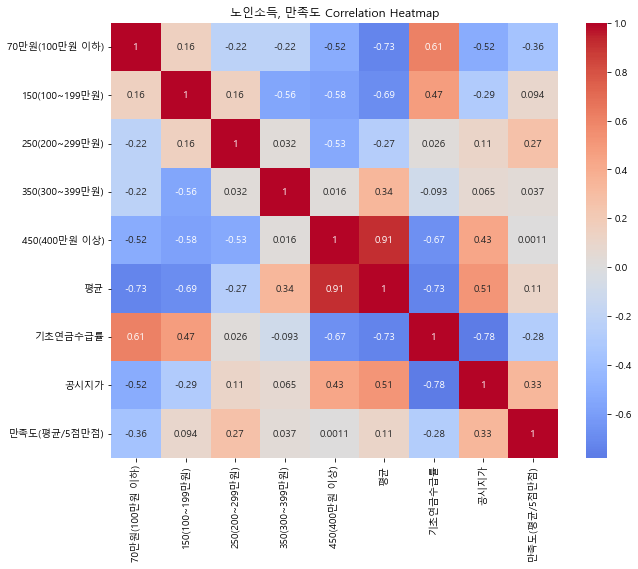

In [72]:
# Calculate the correlation matrix
correlation_matrix = scaled_df_5.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('노인소득, 만족도 Correlation Heatmap')
plt.show()

## 5.3.노인소득 PCA 가중치부여

In [73]:
pca = PCA()
principal_components = pca.fit_transform(scaled_df_5[df_7.columns])

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate weights based on explained variance ratio
weights = explained_variance_ratio / np.sum(explained_variance_ratio)

# Print the weights
print("PCA-based Weights:")
for i, weight in enumerate(weights):
    print(f"Variable {i + 1}: {weight:.32f}")

PCA-based Weights:
Variable 1: 0.50673345374500577964482772586052
Variable 2: 0.18296487167048797184421005113109
Variable 3: 0.15789473218881569516192087121453
Variable 4: 0.08487058049422104011316747573801
Variable 5: 0.04891811896680336307907666082428
Variable 6: 0.01861478498954726237823997792020
Variable 7: 0.00000345794511885308832288251149
Variable 8: 0.00000000000000000000000000000001


In [74]:
pca_weight = [0.50673345374500589066713018837618,0.18296487167048774979960512609978,0.15789473218881586169537456498801,0.08487058049422109562431870699584,0.04891811896680336307907666082428,0.01861478498954726931713388182743,0.00000345794511885309636969551041,0.00000000000000000000000000000001]

In [75]:
weighted_df = scaled_df_5[df_7.columns].copy()  # Create a copy of the original DataFrame
for i, col in enumerate(df_7.columns):
    weighted_df[col] = scaled_df_5[col] * pca_weight[i]

In [76]:
row_sums = weighted_df.sum(axis=1)

# Add the row sums as a new attribute in a new column
weighted_df['자치구별노인소득점수'] = row_sums

In [77]:
result = weighted_df["자치구별노인소득점수"]*5

In [78]:
Gu =list(merged_df.index)

In [79]:
result.tolist()

[1.0838857553597872,
 3.165758816960037,
 3.318001952386422,
 2.9278088632306924,
 2.3633044260554437,
 1.989650396982654,
 3.365704028552959,
 3.53034458062716,
 3.251017459445258,
 2.7691088016776355,
 1.9800834763882758,
 2.3755132535850327,
 3.6292712873229274,
 2.6170705487286017,
 1.0420353224327923,
 2.0214916775496445,
 3.177777534138391,
 1.8155321855294462,
 3.3422098770636066,
 3.143351180195298,
 2.614796044356983,
 3.1523020156609216,
 2.5223114663761432,
 2.984857725676766,
 2.571713894464432]

In [80]:
# Create a DataFrame
result_df_pca = pd.DataFrame({'자치구': Gu, '자치구별노인소득점수': result})

In [81]:
result_df_pca

,자치구,자치구별노인소득점수
0,강남구,1.083886
1,강동구,3.165759
2,강북구,3.318002
3,강서구,2.927809
4,관악구,2.363304
5,광진구,1.989650
6,구로구,3.365704
7,금천구,3.530345
8,노원구,3.251017
9,도봉구,2.769109


## 5.4.노인소득 OLS 및 회귀분석

In [82]:
# Set up the dependent variable (target) and explanatory variables
y = scaled_df_5["만족도(평균/5점만점)"]
X = scaled_df_5[list(scaled_df_5.drop("만족도(평균/5점만점)",axis=1).columns)]

# Add a constant term to the X matrix for the intercept
X = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X).fit()

# Get regression coefficients
coefficients = model.params[1:]  # Exclude the intercept

# Normalize coefficients to get weights
weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Print the weights
print("Regression Coefficient-based Weights:")
print(weights)

Regression Coefficient-based Weights:
70만원(100만원 이하)    0.224908
150(100~199만원)    0.175702
250(200~299만원)    0.096885
350(300~399만원)    0.018936
450(400만원 이상)     0.078044
평균                0.392219
기초연금수급률           0.007235
공시지가              0.006071
dtype: float64


In [83]:
ols_weight= [0.224908,0.175702,0.096885,0.018936,0.078044,0.392219,0.007235,0.006071]

In [84]:
weighted_df = scaled_df_5[list(scaled_df_5.drop("만족도(평균/5점만점)",axis=1).columns)].copy()  # Create a copy of the original DataFrame
for i, col in enumerate(scaled_df_5.drop("만족도(평균/5점만점)",axis=1).columns):
    weighted_df[col] = scaled_df_5[col] * ols_weight[i]

In [85]:
row_sums = weighted_df.sum(axis=1)

# Add the row sums as a new attribute in a new column
weighted_df['자치구별노인소득점수'] = row_sums

In [86]:
result = weighted_df["자치구별노인소득점수"]*5

In [87]:
result.tolist()

[2.477631177442859,
 2.079533222070394,
 1.8086142990445366,
 2.070264006155918,
 2.1854029891251425,
 1.9399679270445387,
 2.11674548046321,
 1.9048621450968117,
 2.104683028622267,
 1.9614449284508613,
 2.4268266967202936,
 2.275343648597503,
 1.959386718353616,
 2.0525007934022756,
 2.608711845926228,
 2.0367868259944935,
 2.034905686390772,
 2.14883682722638,
 2.1133881733091426,
 1.962159534592875,
 1.9712112751923583,
 2.030946827045803,
 2.1422770574639523,
 1.9825647594789304,
 1.9564732455926999]

In [88]:
# Create a DataFrame
result_df_ols = pd.DataFrame({'자치구': Gu, '자치구별노인소득점수': result})


In [89]:
result_df_ols

,자치구,자치구별노인소득점수
0,강남구,2.477631
1,강동구,2.079533
2,강북구,1.808614
3,강서구,2.070264
4,관악구,2.185403
5,광진구,1.939968
6,구로구,2.116745
7,금천구,1.904862
8,노원구,2.104683
9,도봉구,1.961445


# 6.교통편의 

## 6.1.교통편의 데이터 개요

In [90]:
df_2.drop('Unnamed: 0',axis=1, inplace=True)
df_2.rename(columns={'지역구':'자치구'},inplace=True)
df_2

,자치구,대중교통이용만족도(2022),면적당 버스정류장 수,면적당 전철역 수,차량 평균 속도(2021),차량 평균 속도(2022),전철역 승하차 편의 시설 수(엘레베이터),승객_수
0,강남구,5.96,15.594937,0.886076,23.7,23.5,75,437712752.0
1,강동구,6.85,17.852786,0.610004,22.4,22.5,20,139724164.0
2,강북구,7.07,20.720339,0.466102,20.8,20.3,21,145314524.0
3,강서구,6.94,16.743064,0.506634,22.7,22.3,33,207469426.0
4,관악구,6.66,17.179574,0.338181,24.6,24.9,11,287209672.0
5,광진구,6.35,18.874560,0.644783,23.8,23.8,13,162570033.0
6,구로구,6.70,30.765408,0.646123,22.3,22.6,26,199252435.0
7,금천구,6.74,30.261137,0.307220,22.2,22.7,7,107746211.0
8,노원구,6.75,16.563205,0.451467,22.7,22.3,36,177580032.0
9,도봉구,7.43,20.774818,0.338983,20.8,21.2,20,108211762.0


In [91]:
# 자치구로 인덱스 변환 및 여가만족도와 합치기
df_2 = df_2.set_index('자치구')
merged_df = df_2.merge(df_5, left_index=True, right_index=True)
merged_df

,대중교통이용만족도(2022),면적당 버스정류장 수,면적당 전철역 수,차량 평균 속도(2021),차량 평균 속도(2022),전철역 승하차 편의 시설 수(엘레베이터),승객_수,만족도(평균/5점만점)
자치구,,,,,,,,
강남구,5.96,15.594937,0.886076,23.7,23.5,75,437712752.0,3.4
강동구,6.85,17.852786,0.610004,22.4,22.5,20,139724164.0,3.0
강북구,7.07,20.720339,0.466102,20.8,20.3,21,145314524.0,3.0
강서구,6.94,16.743064,0.506634,22.7,22.3,33,207469426.0,3.2
관악구,6.66,17.179574,0.338181,24.6,24.9,11,287209672.0,3.1
광진구,6.35,18.874560,0.644783,23.8,23.8,13,162570033.0,3.3
구로구,6.70,30.765408,0.646123,22.3,22.6,26,199252435.0,2.6
금천구,6.74,30.261137,0.307220,22.2,22.7,7,107746211.0,3.1
노원구,6.75,16.563205,0.451467,22.7,22.3,36,177580032.0,3.3


## 6.2.스케일링 후 여가만족도와 교통편의의 상관관계 분석 및 히트맵

In [92]:
column_names = merged_df.columns

scaled_df_6 = pd.DataFrame(Mscaler.fit_transform(merged_df), columns=column_names)


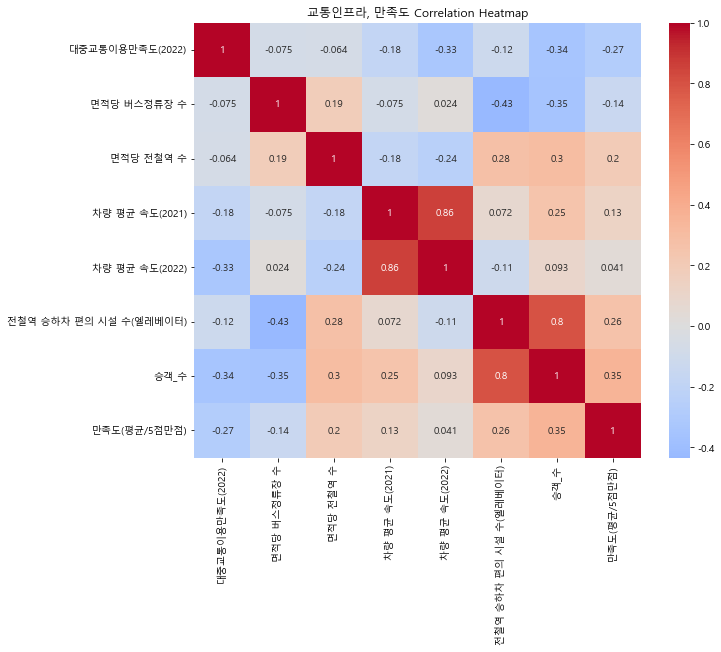

In [93]:
# Calculate the correlation matrix
correlation_matrix = scaled_df_6.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('교통인프라, 만족도 Correlation Heatmap')
plt.show()

## 6.3.교통편의 PCA 및 가중치부여

In [94]:
pca = PCA()
principal_components = pca.fit_transform(scaled_df_6[df_2.columns])

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate weights based on explained variance ratio
weights = explained_variance_ratio / np.sum(explained_variance_ratio)

# Print the weights
print("PCA-based Weights:")
for i, weight in enumerate(weights):
    print(f"Variable {i + 1}: {weight:.32f}")

PCA-based Weights:
Variable 1: 0.35462262213672490762661482222029
Variable 2: 0.28600211626430233069484643237956
Variable 3: 0.18708963223049049351409678365599
Variable 4: 0.08991586467166302887310536107179
Variable 5: 0.05030249410982705338124532090660
Variable 6: 0.01868868882063806982629650121908
Variable 7: 0.01337858176635417506439296175813


In [95]:
pca_weight = [0.35462262213672490762661482222029,0.28600211626430233069484643237956,0.18708963223049049351409678365599,0.08991586467166302887310536107179,0.05030249410982705338124532090660,
0.01868868882063806982629650121908,0.01337858176635417506439296175813]

weighted_df = scaled_df_6[df_2.columns].copy()  # Create a copy of the original DataFrame
for i, col in enumerate(df_2.columns):
    weighted_df[col] = scaled_df_6[col] * pca_weight[i]

row_sums = weighted_df.sum(axis=1)

# Add the row sums as a new attribute in a new column
weighted_df['자치구별교통점수'] = row_sums
result = weighted_df["자치구별교통점수"]*5

result.tolist()

[1.1231978425424933,
 1.8047865236819984,
 2.0222678271744607,
 1.8062018081505882,
 1.7734521811106072,
 1.59886463342244,
 2.878836230328778,
 2.7217443946995292,
 1.5933670173615715,
 2.3518475157766767,
 2.541480523299504,
 3.1862914015297203,
 2.327613275433502,
 2.620734400165992,
 1.8110785162020495,
 3.4329633079482322,
 2.8325849444542333,
 1.901427262085562,
 1.630006819202946,
 1.3965250852073958,
 2.378797115727452,
 1.4969936992779926,
 2.166276091457307,
 3.030599297310896,
 1.6575017592423062]

In [96]:
result_df_PCA = pd.DataFrame({'자치구': Gu, '자치구교통점수': result})
result_df_PCA

,자치구,자치구교통점수
0,강남구,1.123198
1,강동구,1.804787
2,강북구,2.022268
3,강서구,1.806202
4,관악구,1.773452
5,광진구,1.598865
6,구로구,2.878836
7,금천구,2.721744
8,노원구,1.593367
9,도봉구,2.351848


## 6.4.교통편의 OLS 및 회귀분석

In [97]:
y = scaled_df_6["만족도(평균/5점만점)"]
X = scaled_df_6[list(scaled_df_6.drop("만족도(평균/5점만점)",axis=1).columns)]

# Add a constant term to the X matrix for the intercept
X = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X).fit()

# Get regression coefficients
coefficients = model.params[1:]  # Exclude the intercept

# Normalize coefficients to get weights
weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Print the weights
print("Regression Coefficient-based Weights:")
print(weights)

Regression Coefficient-based Weights:
대중교통이용만족도(2022)           0.204986
면적당 버스정류장 수               0.060839
면적당 전철역 수                 0.134867
차량 평균 속도(2021)            0.221239
차량 평균 속도(2022)            0.219988
전철역 승하차 편의 시설 수(엘레베이터)    0.045773
승객_수                      0.112308
dtype: float64


In [98]:
ols_weight= [0.204986,0.060839,0.134867,0.221239,0.219988,0.045773,0.112308]
weighted_df = scaled_df_6[list(scaled_df_6.drop("만족도(평균/5점만점)",axis=1).columns)].copy()  # Create a copy of the original DataFrame
for i, col in enumerate(scaled_df_6.drop("만족도(평균/5점만점)",axis=1).columns):
    weighted_df[col] = scaled_df_6[col] * ols_weight[i]
    
row_sums = weighted_df.sum(axis=1)

# Add the row sums as a new attribute in a new column
weighted_df['자치구별교통점수'] = row_sums

In [99]:
result = weighted_df["자치구별교통점수"]*5
result.tolist()

[2.2717007024324505,
 1.622549375583431,
 1.102155608000047,
 1.8165055176791565,
 2.5031337982224326,
 1.8880706752218557,
 1.9185991927051147,
 1.6349342752366174,
 1.657578769134771,
 1.3486795311612432,
 1.9611889865702827,
 3.0027543041189855,
 2.293861491227169,
 1.9312725294284625,
 2.799573428388285,
 2.584815304857253,
 2.243883441648612,
 2.1783170269118184,
 2.075469425795865,
 1.5171550319885476,
 3.0523670721134444,
 0.991662140331969,
 1.9984008923145558,
 1.930820466790843,
 1.2357572403777835]

In [100]:
result_df_ols = pd.DataFrame({'자치구': Gu, '자치구별교통점수': result})
result_df_ols

,자치구,자치구별교통점수
0,강남구,2.271701
1,강동구,1.622549
2,강북구,1.102156
3,강서구,1.816506
4,관악구,2.503134
5,광진구,1.888071
6,구로구,1.918599
7,금천구,1.634934
8,노원구,1.657579
9,도봉구,1.348680


***

# 7.기타코드

## 7.1.스케일링에 따른 상관관계 비교

In [101]:
df_3 = pd.read_csv("Data_in_Code/자치구노인인구수.csv", encoding = 'utf8')
df_5 = pd.read_csv("Data_in_Code/자치구별 만족도.csv", encoding = 'utf8')
df_5.rename(columns={'자치구별':'자치구'},inplace=True)
merged_df_3 = df_3.merge(df_5)
merged_df_3.drop('자치구',axis=1,inplace=True)
merged_df_3

,노인인구수,만족도(평균/5점만점)
0,105161,3.3
1,98659,3.2
2,93279,3.3
3,90556,3.0
4,83420,3.1
5,83097,3.4
6,79706,3.0
7,78427,3.3
8,77259,2.6
9,76116,3.1


In [102]:
# List of column names for which to calculate correlations
column_names = merged_df_3.columns

# Scale the data using MinMaxScaler
scaled_df_7 = pd.DataFrame(Sscaler.fit_transform(merged_df_3), columns=column_names)


In [103]:
# 피어슨 상관계수 검정
corr = stats.pearsonr(scaled_df_7['노인인구수'], scaled_df_7['만족도(평균/5점만점)'])
corr

(0.10559887617646185, 0.6154062246353836)

In [104]:
scaled_df_7

,노인인구수,만족도(평균/5점만점)
0,1.875005,0.921496
1,1.550099,0.494878
2,1.281260,0.921496
3,1.145192,-0.358360
4,0.788605,0.068259
5,0.772465,1.348115
6,0.603017,-0.358360
7,0.539105,0.921496
8,0.480740,-2.064834
9,0.423624,0.068259


In [105]:
# 자치구로 인덱스 변환
df_5 = df_5.set_index('자치구')
df_3 = df_3.set_index('자치구')

In [106]:
merged_df = df_3.merge(df_5, left_index=True, right_index=True)
merged_df

,노인인구수,만족도(평균/5점만점)
자치구,,
송파구,105161,3.3
강서구,98659,3.2
노원구,93279,3.3
은평구,90556,3.0
관악구,83420,3.1
강남구,83097,3.4
강동구,79706,3.0
성북구,78427,3.3
구로구,77259,2.6


In [107]:
# 변경할 속성이름 정의하기 
new_names_columns1 = {
            '만족도(평균/5점만점)' : '만족도',
            }

# 속성이름 변경하기
merged_df.rename(columns=new_names_columns1, inplace=True)

In [108]:
merged_df

,노인인구수,만족도
자치구,,
송파구,105161,3.3
강서구,98659,3.2
노원구,93279,3.3
은평구,90556,3.0
관악구,83420,3.1
강남구,83097,3.4
강동구,79706,3.0
성북구,78427,3.3
구로구,77259,2.6


In [109]:
# 피어슨 상관계수 검정
corr = stats.pearsonr(merged_df.만족도, merged_df.노인인구수)
corr

(0.10559887617646184, 0.6154062246353832)

## 7.2.여가시설 변수 축소과정

In [110]:
facil_data = pd.read_csv('Data_in_Code/시설수데이터+만족도.csv')
facil_data = facil_data.set_index('자치구')
merged_df1 = facil_data.merge(df_5, left_index=True, right_index=True)
new_names_columns = {
            '만족도(평균/5점만점)' : '만족도',
            }

# 속성이름 변경하기
merged_df1.rename(columns=new_names_columns, inplace=True)
merged_df1

,호텔수,노래방시설수,오락실시설수,무도회장시설수,썰매장시설수,빙상장 수,체육시설 수,편의시설수,공연시설수,전시시설수,...,목욕탕 수,영화관 수,유적지 수,축제 수,테마파크 수,노인복지관 시설수,경로당 시설수,노인교실 시설수,만족도(평균/5점만점)_x,만족도(평균/5점만점)_y
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,63,221,1,0,0,3,54,11678,1374,267,...,404,10,6,80,0,3,167,20,3.4,3.4
강동구,4,228,12,1,0,0,2,5180,38,169,...,162,3,1,91,1,2,124,10,3.0,3.0
강북구,6,300,26,1,0,2,2,1715,20,106,...,125,3,4,97,1,1,100,17,3.0,3.0
강서구,20,303,18,0,1,1,4,5172,97,210,...,153,6,2,22,0,1,219,25,3.2,3.2
관악구,15,267,59,2,0,0,4,2336,44,196,...,160,2,1,84,0,1,113,17,3.1,3.1
광진구,12,306,5,0,1,1,3,3603,78,115,...,155,6,2,113,4,1,95,8,3.3,3.3
구로구,14,293,44,0,0,2,2,3094,52,167,...,129,3,2,150,0,1,201,20,2.6,2.6
금천구,10,191,14,0,0,0,1,3203,41,80,...,89,2,0,47,0,2,73,9,3.1,3.1
노원구,1,257,4,0,1,2,4,1526,24,205,...,113,5,8,128,1,1,246,14,3.3,3.3


In [111]:
# List of column names for which to calculate correlations
column_names = merged_df1.columns

# Calculate correlations for each pair of columns
correlation_results = []

for col1 in column_names:
    for col2 in column_names:
        if col1 != col2:
            corr, p_value = stats.pearsonr(merged_df1[col1], merged_df1[col2])
            correlation_results.append((col1, col2, corr, p_value))

# Display correlation results
for col1, col2, corr, p_value in correlation_results:
    print(f"Correlation between {col1} and {col2}:")
    print(f"Pearson's correlation coefficient: {corr}")
    print(f"p-value: {p_value}\n")


Correlation between 호텔수 and 노래방시설수:
Pearson's correlation coefficient: -0.2642563329682079
p-value: 0.20178855074650037

Correlation between 호텔수 and 오락실시설수:
Pearson's correlation coefficient: -0.11724978340706829
p-value: 0.576730790928649

Correlation between 호텔수 and 무도회장시설수:
Pearson's correlation coefficient: -0.18615520104266228
p-value: 0.3729573316041463

Correlation between 호텔수 and 썰매장시설수:
Pearson's correlation coefficient: -0.13513885593546637
p-value: 0.5195324833041922

Correlation between 호텔수 and 빙상장 수:
Pearson's correlation coefficient: 0.07496167186159876
p-value: 0.7217497737310863

Correlation between 호텔수 and 체육시설 수:
Pearson's correlation coefficient: 0.4223959222159468
p-value: 0.03542679948237411

Correlation between 호텔수 and 편의시설수:
Pearson's correlation coefficient: 0.3769869532674111
p-value: 0.06321905976141129

Correlation between 호텔수 and 공연시설수:
Pearson's correlation coefficient: 0.45546814958917414
p-value: 0.022139146696950843

Correlation between 호텔수 and 전시시설수:
Pe

Correlation between 무도회장시설수 and 만족도:
Pearson's correlation coefficient: -0.48667052985401305
p-value: 0.013623795129832117
Correlation between 패션/미용소비 수 and 만족도:
Pearson's correlation coefficient: 0.41078733205562684
p-value: 0.04136741575650371
Correlation between 대형소비시설 수 and 만족도:
Pearson's correlation coefficient: 0.4650107906190816
p-value: 0.019170911149897153
Correlation between 목욕탕 수 and 만족도:
Pearson's correlation coefficient: 0.4760204117344777
p-value: 0.016157856314976144
Correlation between 영화관 수 and 만족도:
Pearson's correlation coefficient: 0.4095696219444234
p-value: 0.0420335703702035
Correlation between 테마파크 수 and 만족도:
Pearson's correlation coefficient: 0.4138496659909276
p-value: 0.039728963287997646

In [112]:
# 자치구로 인덱스 변환
df_4 = df_4.set_index('자치구')

In [113]:
merged_df1 = df_4.merge(df_5, left_index=True, right_index=True)

In [114]:
# 변경할 속성이름 정의하기 
new_names_columns = {
            '만족도(평균/5점만점)' : '만족도',
            }

# 속성이름 변경하기
merged_df1.rename(columns=new_names_columns, inplace=True)

In [115]:
merged_df1

,문화예술시설,스포츠시설 수,관광 시설,취미오락 시설,휴식 시설,소비 시설,노인시설 수,만족도
자치구,,,,,,,,
강남구,1641,1335,94,247,665,32896,193,3.4
강동구,207,445,98,253,332,14426,137,3.0
강북구,126,282,114,336,240,7980,118,3.0
강서구,307,766,27,336,430,16152,249,3.2
관악구,240,354,90,333,326,11788,131,3.1
광진구,193,407,128,324,247,12072,104,3.3
구로구,219,486,156,353,243,11187,223,2.6
금천구,121,315,48,211,190,9603,85,3.1
노원구,229,477,147,275,342,9268,263,3.3


# 8.OLS 회귀분석을 이용한 변수유의성 검증

## 8.1.여가시설수 모델검증

In [116]:
df_4_column_names = df_4.columns

# 컬럼 이름을 기준으로 독립, 종속 변수 지정
X = scaled_df_2[df_4_column_names]
y = scaled_df_2['만족도(평균/5점만점)']

model = sm.OLS(y, X).fit() # 회귀 모델 학습

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           만족도(평균/5점만점)   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              10.30
Date:                Tue, 29 Aug 2023   Prob (F-statistic):                    3.50e-05
Time:                        11:32:23   Log-Likelihood:                         -5.4100
No. Observations:                  25   AIC:                                      24.82
Df Residuals:                      18   BIC:                                      33.35
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
문화예술시설        -0.4215      0.997     -0.423      0.678      -2.517       1.674
스포츠시설 수       -0.8756      0.791     -1.107      0.283      -2.538       0.787
관광 시설          0.0694      0.369      0.188      0.853      -0.705       0.844
취미오락 시설        0.1850      0.410      0.452      0.657      -0.676       1.046
휴식 시설          1.3637      0.818      1.666      0.113      -0.356       3.083
소비 시설          0.6430      1.393      0.461      0.650      -2.284       3.570
노인시설 수         0.5291      0.315      1.678      0.111      -0.133       1.192
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.439
Skew:                           0.160   Prob(JB):                        0.803
Kurtosis:                       2.435   Cond. No.                         20.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8.2.노인인구 모델검증

In [117]:
df_3_column_names = data1_1.columns

# 컬럼 이름을 기준으로 독립, 종속 변수 지정
X = scaled_df_3[df_3_column_names]
y = scaled_df_3['만족도(평균/5점만점)']

model = sm.OLS(y, X).fit() # 회귀 모델 학습

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           만족도(평균/5점만점)   R-squared (uncentered):                   0.696
Model:                            OLS   Adj. R-squared (uncentered):              0.670
Method:                 Least Squares   F-statistic:                              26.39
Date:                Tue, 29 Aug 2023   Prob (F-statistic):                    1.11e-06
Time:                        11:32:24   Log-Likelihood:                         -10.641
No. Observations:                  25   AIC:                                      25.28
Df Residuals:                      23   BIC:                                      27.72
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
일반노인수          0.9788      0.398      2.462      0.022       0.156       1.801
독거노인수          0.0402      0.416      0.097      0.924      -0.819       0.900
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.139
Skew:                           0.130   Prob(JB):                        0.933
Kurtosis:                       2.743   Cond. No.                         5.52
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8.3.노인건강 모델검증

In [118]:
df_1_column_names = scaled_df_4.drop(['사회/여가/문화 만족도(평균)'], axis=1).columns

# 컬럼 이름을 기준으로 독립, 종속 변수 지정
X = scaled_df_4[df_1_column_names]
y = scaled_df_4['사회/여가/문화 만족도(평균)']

model = sm.OLS(y, X).fit() # 회귀 모델 학습

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       사회/여가/문화 만족도(평균)   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                              12.21
Date:                Tue, 29 Aug 2023   Prob (F-statistic):                    1.30e-05
Time:                        11:32:25   Log-Likelihood:                         0.24510
No. Observations:                  25   AIC:                                      17.51
Df Residuals:                      16   BIC:                                      28.48
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
질병있음           0.1576      0.271      0.581      0.569      -0.417       0.732
운동X            0.5881      0.345      1.705      0.108      -0.143       1.319
운동 평균 횟수       0.9783      0.302      3.236      0.005       0.337       1.619
흡연             0.0517      0.302      0.171      0.866      -0.588       0.691
음주 O           0.3514      0.315      1.116      0.281      -0.316       1.019
우울증상있음         0.5166      0.448      1.153      0.266      -0.433       1.466
장애등록O         -0.0528      0.261     -0.203      0.842      -0.606       0.500
일상생활 도움 필요    -0.1563      0.306     -0.511      0.616      -0.804       0.492
건강(나쁨)        -0.9727      0.416     -2.341      0.033      -1.854      -0.092
==============================================================================
Omnibus:                        6.819   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.809
Skew:                          -0.821   Prob(JB):                       0.0903
Kurtosis:                       4.387   Cond. No.                         14.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8.4.노인소득 모델검증

In [119]:
df_7_column_names = df_7.columns

# 컬럼 이름을 기준으로 독립, 종속 변수 지정
X = scaled_df_5[df_7_column_names]
y = scaled_df_5['만족도(평균/5점만점)']

model = sm.OLS(y, X).fit() # 회귀 모델 학습

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           만족도(평균/5점만점)   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.7909
Date:                Tue, 29 Aug 2023   Prob (F-statistic):              0.605
Time:                        11:32:26   Log-Likelihood:                -1.2600
No. Observations:                  25   AIC:                             18.52
Df Residuals:                      17   BIC:                             28.27
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
70만원(100만원 이하)    -6.0241     17.600     -0.342      0.736     -43.158      31.110
150(100~199만원)    -2.2095      7.945     -0.278      0.784     -18.971      14.552
250(200~299만원)     2.5658      6.411      0.400      0.694     -10.961      16.093
350(300~399만원)     5.5706     15.379      0.362      0.722     -26.877      38.018
450(400만원 이상)     22.3937     64.370      0.348      0.732    -113.416     158.203
평균               -25.8426     75.203     -0.344      0.735    -184.507     132.822
기초연금수급률           -0.2435      0.527     -0.462      0.650      -1.355       0.868
공시지가               0.2044      0.431      0.475      0.641      -0.704       1.113
==============================================================================
Omnibus:                        1.366   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                1.256
Skew:                          -0.442   Prob(JB):                        0.534
Kurtosis:                       2.347   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 8.5.교통편의 모델검증

In [120]:
df_2_column_names = df_2.columns

# 컬럼 이름을 기준으로 독립, 종속 변수 지정
X = scaled_df_6[df_2_column_names]
y = scaled_df_6['만족도(평균/5점만점)']

model = sm.OLS(y, X).fit() # 회귀 모델 학습

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           만족도(평균/5점만점)   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              10.61
Date:                Tue, 29 Aug 2023   Prob (F-statistic):                    2.87e-05
Time:                        11:32:26   Log-Likelihood:                         -5.1160
No. Observations:                  25   AIC:                                      24.23
Df Residuals:                      18   BIC:                                      32.76
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
대중교통이용만족도(2022)            0.2859      0.229      1.247      0.228      -0.196       0.768
면적당 버스정류장 수                0.1285      0.225      0.572      0.575      -0.344       0.601
면적당 전철역 수                  0.2338      0.434      0.538      0.597      -0.679       1.146
차량 평균 속도(2021)             0.0311      0.610      0.051      0.960      -1.251       1.313
차량 평균 속도(2022)             0.2758      0.601      0.459      0.652      -0.987       1.538
전철역 승하차 편의 시설 수(엘레베이터)     0.1172      0.601      0.195      0.848      -1.145       1.379
승객_수                       0.5511      0.573      0.962      0.349      -0.653       1.755
==============================================================================
Omnibus:                        1.681   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.506
Skew:                          -0.515   Prob(JB):                        0.471
Kurtosis:                       2.381   Cond. No.                         12.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""